# WeatherPy
----

#### Observations
* Latitude vs Wind Speed did not show any real pattern of wind speed around the equator.
* Latitude vs Max Temperature showed that as latitude increases, the temperature decreases, and as latitude decreases, temperature increases. It gets warmer towards the equator and cooler towards the poles.
* 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config info
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL to get the weather data
query_url = f"{base_url}appid={gkey}&units={units}&q="

response = requests.get(query_url + city).json()
pprint.pprint(response)


{'base': 'stations',
 'clouds': {'all': 81},
 'cod': 200,
 'coord': {'lat': -2.0833, 'lon': 101.3833},
 'dt': 1666472244,
 'id': 1625929,
 'main': {'feels_like': 62.89,
          'grnd_level': 898,
          'humidity': 91,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 62.65,
          'temp_max': 62.65,
          'temp_min': 62.65},
 'name': 'Sungai Penuh',
 'sys': {'country': 'ID', 'sunrise': 1666479219, 'sunset': 1666523025},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 11, 'gust': 2.1, 'speed': 1.45}}


In [4]:
# set empty lists to hold response info
city_list = []
lat_list = []
lng_list = []
temp_max_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []


print(f'----------------------------------')    
print(f'Beginning Data Retrieval')
print(f'----------------------------------')


#set counter
counter = 1


# loop thru list of cities to request data for each city
for city in cities:
    # try to grab responses from the openweather API if available for that city
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        temp_max_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response['wind']['speed'])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        city_name = response['name']
        print(f"Processing Record " + str(counter) + " of set " + "|" + city_name) 
        
        # set counter increase by 1 for each time it loops thru the cities
        counter += 1
        
        # handle exceptions for the city that is not available in the openweather API
    except:
            print("City not found. Skipping...")
    continue

               
print(f'----------------------------------')    
print(f'Data Retrieval Complete')
print(f'----------------------------------')

----------------------------------
Beginning Data Retrieval
----------------------------------
Processing Record 1 of set |Upernavik
Processing Record 2 of set |Harnai
Processing Record 3 of set |Pec
Processing Record 4 of set |Bluff
Processing Record 5 of set |Dunedin
Processing Record 6 of set |Hong Kong
Processing Record 7 of set |Gīdam
Processing Record 8 of set |Mahébourg
Processing Record 9 of set |Hermanus
Processing Record 10 of set |Indian Head
Processing Record 11 of set |Ostrovnoy
Processing Record 12 of set |East London
Processing Record 13 of set |Mataura
City not found. Skipping...
Processing Record 14 of set |Thompson
Processing Record 15 of set |Jamestown
Processing Record 16 of set |Harpālpur
Processing Record 17 of set |New Norfolk
Processing Record 18 of set |Baruun-Urt
Processing Record 19 of set |Nouadhibou
Processing Record 20 of set |Hobart
Processing Record 21 of set |Port Blair
Processing Record 22 of set |Puerto Ayora
Processing Record 23 of set |Butaritari
Pr

Processing Record 198 of set |Gogrial
Processing Record 199 of set |Piaçabuçu
Processing Record 200 of set |Plettenberg Bay
Processing Record 201 of set |Norman Wells
Processing Record 202 of set |Görele
City not found. Skipping...
Processing Record 203 of set |Katsuura
Processing Record 204 of set |Nemuro
Processing Record 205 of set |Shenjiamen
Processing Record 206 of set |Abu Samrah
Processing Record 207 of set |Ulladulla
Processing Record 208 of set |Raudeberg
Processing Record 209 of set |Basco
Processing Record 210 of set |Søndersø
Processing Record 211 of set |King City
Processing Record 212 of set |Lorengau
Processing Record 213 of set |Aného
Processing Record 214 of set |Elizabeth City
Processing Record 215 of set |Ribeira Grande
Processing Record 216 of set |Sakakah
Processing Record 217 of set |São José da Coroa Grande
Processing Record 218 of set |Xining
Processing Record 219 of set |Port Pirie
Processing Record 220 of set |Ekhabi
Processing Record 221 of set |Sidi Ali
Pro

Processing Record 393 of set |Provost
Processing Record 394 of set |Narsaq
Processing Record 395 of set |Rawson
Processing Record 396 of set |Kontagora
Processing Record 397 of set |Along
Processing Record 398 of set |Nikel
Processing Record 399 of set |Isangel
City not found. Skipping...
Processing Record 400 of set |Altagracia de Orituco
Processing Record 401 of set |Muzhi
Processing Record 402 of set |Ponta Delgada
Processing Record 403 of set |Contrecoeur
Processing Record 404 of set |Swakopmund
City not found. Skipping...
Processing Record 405 of set |Ozernovskiy
Processing Record 406 of set |Kendari
Processing Record 407 of set |Clarence Town
Processing Record 408 of set |Raja
Processing Record 409 of set |Pustoshka
Processing Record 410 of set |Verín
Processing Record 411 of set |Broken Hill
Processing Record 412 of set |Durban
Processing Record 413 of set |Flin Flon
Processing Record 414 of set |Marrakesh
Processing Record 415 of set |Cikampek
Processing Record 416 of set |Anto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Display the DataFrame

city_data_df = pd.DataFrame({
    'City': city_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': temp_max_list,
    'Humidity': humidity_list,
    'Cloudiness': cloudiness_list,
    'Wind Speed': wind_speed_list,
    'Country': country_list,
    'Date': date_list
})

city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,34.52,97,100,28.03,GL,1666472245
1,Harnai,30.1005,67.9374,68.22,23,0,4.05,PK,1666472245
2,Pec,42.6591,20.2883,59.13,51,15,6.24,XK,1666472245
3,Bluff,-46.6000,168.3333,56.80,69,26,10.47,NZ,1666472246
4,Dunedin,-45.8742,170.5036,55.80,74,6,1.01,NZ,1666471980
...,...,...,...,...,...,...,...,...,...
570,Lufilufi,-13.8745,-171.5986,86.79,75,100,12.88,WS,1666472490
571,Narathiwat,6.3333,101.7500,74.57,97,100,5.91,TH,1666472491
572,Santa Isabel,-23.3156,-46.2214,67.71,85,22,8.03,BR,1666472238
573,Taoudenni,22.6783,-3.9836,87.22,13,87,9.46,ML,1666472492


In [10]:
# Export the city data into a .csv.

city_data_df.to_csv('City Weather Data.csv', index=False)

In [11]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,20.745936,23.025573,60.674000,72.760000,58.511304,7.867461,1.666472e+09
std,33.597825,88.126495,20.026854,20.769134,40.295547,5.405680,1.008388e+02
min,-54.800000,-175.200000,-8.430000,6.000000,0.000000,0.000000,1.666472e+09
25%,-7.695300,-51.456900,47.075000,63.000000,15.000000,3.850000,1.666472e+09
50%,25.519800,26.214000,65.930000,78.000000,71.000000,6.580000,1.666472e+09
75%,50.193000,95.725350,76.920000,88.000000,100.000000,10.595000,1.666472e+09
max,78.218600,179.316700,94.530000,100.000000,100.000000,31.000000,1.666472e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.loc[city_data_df["Humidity"] >= 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
72,Iqaluit,63.7506,-68.5145,32.70,100,100,10.00,CA,1666472272
191,High Level,58.5169,-117.1360,32.11,100,100,9.22,CA,1666472107
367,Kiryat Gat,31.6100,34.7642,70.48,100,0,4.92,IL,1666472385
390,Haftoni,38.7632,48.7622,55.11,100,100,5.75,AZ,1666472394


In [13]:
print(f'There are no indices of cities that have humidity over 100%')

There are no indices of cities that have humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

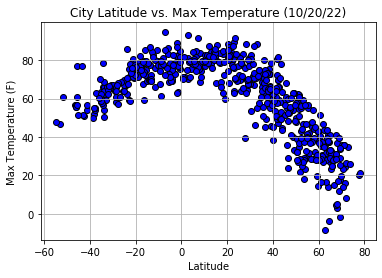

In [14]:
# Create a Scatter Plot for latitude vs temperature 

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (10/20/22)")
plt.grid()

plt.savefig("CityLatitudeVsMaxTemperature.png")

plt.show()

* The City Latitude vs. Max Temperature plot demonstrates that as we move away from the equator the temperature drops.

## Latitude vs. Humidity Plot

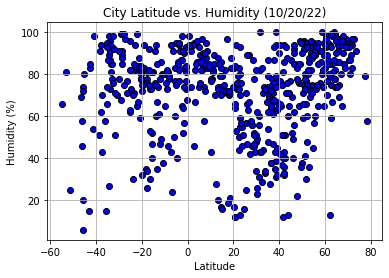

In [15]:
# Create a Scatter Plot for latitude vs humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (10/20/22)")
plt.grid()

plt.savefig("CityLatitudeVsHumidity.png")

plt.show()

* The City Latitude vs. Humidity plot demonstrates that as the temperature increases, humidity decreases.

## Latitude vs. Cloudiness Plot

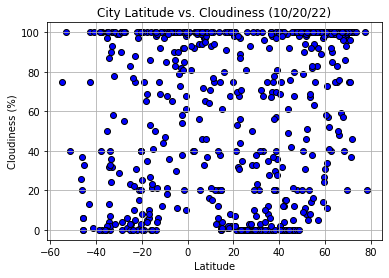

In [16]:
# Create a Scatter Plot for latitude vs cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (10/20/22)")
plt.grid()

plt.savefig("CityLatitudeVsCloudiness.png")

plt.show()

* The City Latitude vs. Cloudiness plot demonstrates no real correlation.

## Latitude vs. Wind Speed Plot

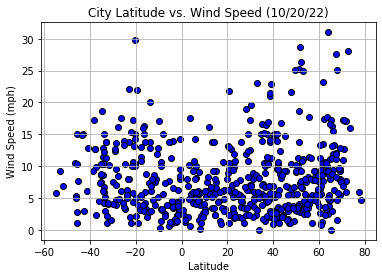

In [17]:
# Create a Scatter Plot for latitude vs wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (10/20/22)")
plt.grid()

plt.savefig("CityLatitudeVsWindSpeed.png")

plt.show()

* The City Latitude vs. Wind Speed plot demonstrates that the wind appears to increase slightly as it moves away from the equator.

## Linear Regression

In [34]:
# create DataFrame for Northern Hemi and Southern Hemi
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lng"]).astype(float) < 0, :]
# northern_df
# southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,34.52,97,100,28.03,GL,1666472245
9,Indian Head,38.6001,-77.1622,72.81,39,57,3.00,US,1666472248
13,Thompson,55.7435,-97.8558,39.36,60,75,4.61,CA,1666472249
14,Jamestown,42.0970,-79.2353,69.44,32,0,10.36,US,1666472031
18,Nouadhibou,20.9310,-17.0347,67.98,94,40,21.85,MR,1666472251
...,...,...,...,...,...,...,...,...,...
567,Libertador General San Martín,-23.8064,-64.7876,86.02,30,77,5.53,AR,1666472489
569,Guasdualito,7.2424,-70.7324,91.40,58,33,5.75,VE,1666472459
570,Lufilufi,-13.8745,-171.5986,86.79,75,100,12.88,WS,1666472490
572,Santa Isabel,-23.3156,-46.2214,67.71,85,22,8.03,BR,1666472238


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.95x + 94.3
The r-value is: 0.749709029076254


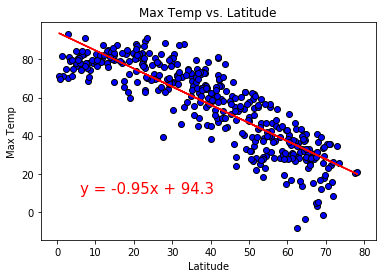

In [48]:
# Create a Scatter Plot for max temp vs latitude
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Max Temp vs. Latitude")
plt.show()

* The Northern Hemisphere - Max Temp vs. Latitude Linear Regression demonstrates a strong negative correlation between latitude and max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.33x + 72.92
The r-value is: 0.32219388048415604


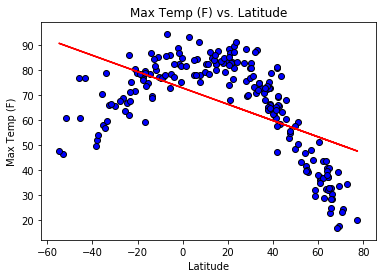

In [64]:
# Create a Scatter Plot for max temp vs latitude
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temp (F) vs. Latitude")
plt.show()

* The Southern Hemisphere - Max Temp vs. Latitude Linear Regression demonstrates a strong negative correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.26x + 61.99
The r-value is: 0.06125627744388791


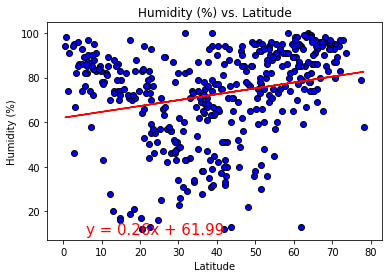

In [56]:
# Create a Scatter Plot for max temp vs latitude
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity (%) vs. Latitude")
plt.show()


* The Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression shows a moderate positive correlation between humidty and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.15x + 64.31
The r-value is: 0.052910426384796004


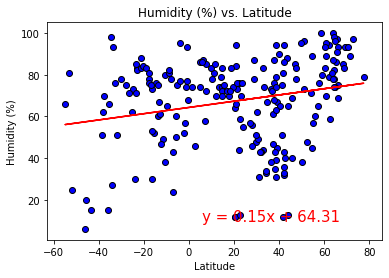

In [57]:
# Create a Scatter Plot for max temp vs latitude
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity (%) vs. Latitude")
plt.show()

* The Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression shows a moderate positive correlation between humidty and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.51x + 40.02
The r-value is: 0.06233113288952568


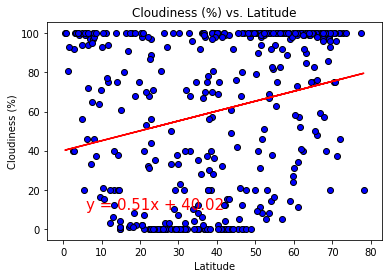

In [59]:
# Create a Scatter Plot for max temp vs latitude
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness (%) vs. Latitude")
plt.show()

* The Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression shows a moderate positive correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.24x + 52.53
The r-value is: 0.0435851993445132


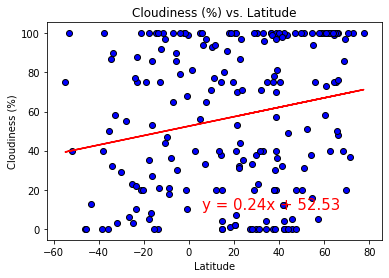

In [58]:
# Create a Scatter Plot for max temp vs latitude
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness (%) vs. Latitude")
plt.show()

* The Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression shows a moderate positive correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.06x + 5.43
The r-value is: 0.046476502665308846


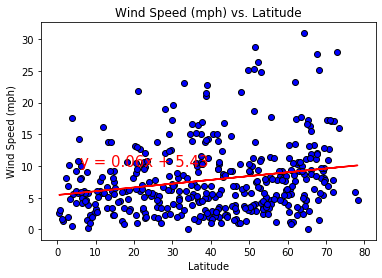

In [60]:
# Create a Scatter Plot for max temp vs latitude
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude")
plt.show()

* The Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression shows a weak positive correlation between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.0x + 8.81
The r-value is: 2.6266310901277015e-05


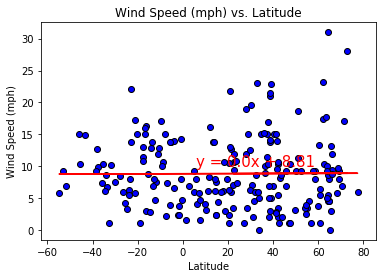

In [61]:
# Create a Scatter Plot for max temp vs latitude
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
# Perform a linear regression on temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# create plot and label
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_values,y_values, marker="o", facecolor='blue', edgecolors='black')
# Print r value
print(f"The r-value is: {rvalue**2}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude")
plt.show()

* The Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression shows a weak positive correlation between wind speed and latitude.